In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

MessageError: Error: credential propagation was unsuccessful

In [2]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install -q supervision roboflow

## Download pre-trained weights

**NOTE:** YOLOv10 provides weight files pre-trained on the COCO dataset in various sizes. Let's download them.

In [4]:
import os

HOME = os.getcwd()

In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 1.2G
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt.1
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt.2
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt.1
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt.2
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt.1
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt.2
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt.1
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt.2
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt.1
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt.2
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt.1
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt.2


## Download example data

**NONE:** Let's download few example images. Feel free to use your images or videos.

In [6]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!ls -lh {HOME}/data

total 312K
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg.1
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg.2


## Inference with Pre-trained COCO Model

**NOTE:** YOLOv10 is based on YOLOv8, and like YOLOv8, it can be used in both CLI and SDK modes.

### 💻 CLI

In [7]:
%cd {HOME}

!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/data/dog.jpeg

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultra

**NONE:** Let's display result.

### 🐍 Python SDK

In [74]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
results = model(source=f'{HOME}/data/dog.jpeg', conf=0.25)


image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 dog, 43.3ms
Speed: 1.6ms preprocess, 43.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


In [75]:
results[0].boxes.xyxy

tensor([[6.7041e+01, 2.5264e+02, 6.4549e+02, 9.6621e+02],
        [7.4646e-01, 3.4156e+02, 5.4170e+02, 1.2773e+03]], device='cuda:0')

In [76]:
results[0].boxes.conf

tensor([0.5090, 0.3536], device='cuda:0')

In [77]:
results[0].boxes.cls

tensor([16.,  0.], device='cuda:0')

**NONE:** Let's display result using `supervision`.


0: 640x384 1 person, 1 dog, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


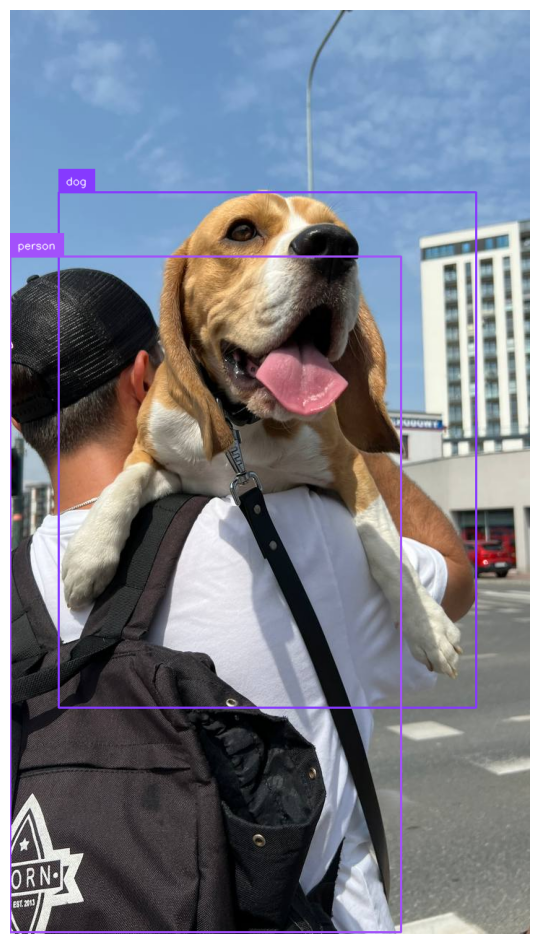

In [78]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
image = cv2.imread(f'{HOME}/data/dog.jpeg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## Streamlit

In [79]:
## 스트림릿 연동
! pip install -q streamlit
!npm install localtunnel


up to date, audited 23 packages in 493ms

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


### 1. 이미지 객체 탐지 모델 배포

In [80]:
%%writefile app.py

import streamlit as st
import cv2
import supervision as sv
from PIL import Image
import numpy as np
from ultralytics import YOLOv10
import os

HOME = os.getcwd()

st.write('## YOLOv10 Inference !') # 해당 내용을 수정해서 사이트를 자유롭게 꾸밀 수 있다.
img_file = st.file_uploader('이미지를 업로드 하세요.', type=['png', 'jpg', 'jpeg'])

# 파일이 업로드된 경우
if img_file is not None:
    # PIL 이미지를 OpenCV 형식으로 변환
    image = Image.open(img_file)
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # PIL 이미지는 RGB이므로 BGR로 변환

    ## Inference Object Detection
    model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
    results = model(image)[0]
    detections = sv.Detections.from_ultralytics(results)

    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    annotated_image = bounding_box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)

    # Convert BGR to RGB for display
    st.image(annotated_image[:, :, ::-1])

Overwriting app.py


In [81]:
import urllib
password_ip = urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n")
print("Password/Enpoint IP for localtunnel is:", password_ip)

Password/Enpoint IP for localtunnel is: 34.74.241.3


In [82]:
!streamlit run app.py &>/content/logs.txt &

In [83]:
!npx localtunnel --port 8501

your url is: https://tall-shirts-melt.loca.lt
^C


### 2. 영상 객체 탐지 모델 배포

영상 출처: https://www.pond5.com

In [8]:
## 스트림릿 연동
! pip install -q streamlit
!npm install localtunnel


up to date, audited 23 packages in 513ms

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [23]:
%%writefile app.py

import streamlit as st
import cv2
from google.colab.patches import cv2_imshow
import supervision as sv
from PIL import Image
import numpy as np
from ultralytics import YOLOv10
import os

def main():
    HOME = os.getcwd()
    st.write('## YOLOv10 Video Inference !') # 해당 내용을 수정해서 사이트를 자유롭게 꾸밀 수 있다.

    file_names = ['None', 'dog', 'dog2', 'people', 'cows', 'birds']
    my_choice = st.selectbox('보고 싶은 영상을 선택하세요', file_names)
    if my_choice == "None":
      file_name = None
    elif my_choice == 'dog':
      file_name = "dog"
    elif my_choice == "dog2":
      file_name = "dog2"
    elif my_choice == "people":
      file_name = "people"
    elif my_choice == "cows":
      file_name = "cows"
    elif my_choice == "birds":
      file_name = "birds"

    st.write(f"{file_name}을 선택하셨습니다!")

    # 파일이 업로드된 경우
    if file_name is not None:
        st.write(file_name)
        ## Inference Object Detection
        model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
        # Open the video file
        input_video_path = f"/content/gdrive/MyDrive/Colab Notebooks/yolov10_input/{file_name}.mov"
        output_video_path = f"/content/gdrive/MyDrive/Colab Notebooks/yolov10_output/{file_name}.mp4"
        cap = cv2.VideoCapture(input_video_path)


        # 비디오 저장 설정
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 코덱 설정 ('XVID', 'mp4v', 등)
        fps = int(cap.get(cv2.CAP_PROP_FPS))  # 원본 비디오의 FPS
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

        # 프레임 단위로 예측 및 저장
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # YOLOv10 모델로 예측
            results = model.predict(frame)
            annotated_frame = results[0].plot()  # 결과 시각화된 프레임

            # 비디오에 프레임 쓰기
            out.write(annotated_frame)

        cap.release()
        out.release()
        cv2.destroyAllWindows()

        video_file = open(output_video_path, 'rb')
        st.write("success")
        st.video(video_file)

if __name__ == "__main__":
    main()

Overwriting app.py


In [24]:
import urllib
password_ip = urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n")
print("Password/Enpoint IP for localtunnel is:", password_ip)

Password/Enpoint IP for localtunnel is: 34.74.241.3


In [25]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

your url is: https://rich-dolls-drop.loca.lt


In [14]:

import streamlit as st
import cv2
from google.colab.patches import cv2_imshow
import supervision as sv
from PIL import Image
import numpy as np
from ultralytics import YOLOv10
import os

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
# Open the video file
video_path = f"/content/gdrive/MyDrive/Colab Notebooks/dog.mov"
cap = cv2.VideoCapture(video_path)

# 비디오 저장 설정
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 코덱 설정 ('XVID', 'mp4v', 등)
output_path = "/content/gdrive/MyDrive/Colab Notebooks/dog_output.mp4"
fps = int(cap.get(cv2.CAP_PROP_FPS))  # 원본 비디오의 FPS
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# 프레임 단위로 예측 및 저장
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # YOLOv10 모델로 예측
    results = model.predict(frame)
    annotated_frame = results[0].plot()  # 결과 시각화된 프레임

    # 비디오에 프레임 쓰기
    out.write(annotated_frame)

cap.release()
out.release()
cv2.destroyAllWindows()



0: 352x640 1 dog, 14.7ms
Speed: 3.1ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 dog, 19.2ms
Speed: 2.8ms preprocess, 19.2ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 dog, 34.7ms
Speed: 6.1ms preprocess, 34.7ms inference, 2.1ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 dog, 18.9ms
Speed: 2.9ms preprocess, 18.9ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 dog, 20.9ms
Speed: 3.1ms preprocess, 20.9ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 dog, 16.3ms
Speed: 2.9ms preprocess, 16.3ms inference, 3.5ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 dog, 15.4ms
Speed: 3.1ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 dog, 14.3ms
Speed: 3.6ms preprocess, 14.3ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 do

In [108]:
results.show()

AttributeError: 'list' object has no attribute 'show'